# WordCloud da Bíblia Sagrada versão NVI

Neste notebook você aprenderá como criar uma wordcloud da bíblia para analisar quais são as palavras que mais aparecem em todo o livro. Espero que este tutorial te ajude de alguma forma. Aqui você aprenderá técnicas de python, pandas, numpy, json, git,wordcloud e visualização de dados.

Utilizaremos um arquivo JSON com toda a Bíblia dividida por capítulos que se encontra [neste link ](https://github.com/thiagobodruk/biblia). Você pode fazer o download do JSON e inicia um notebook do ZERO seguindo este passo a passo, ou pode fazer o download deste notebook e modificar a vontade.

In [1]:
# instale o wordcloud caso você não tenha
!pip install wordcloud -q

# no terminal, retire o ! ou digite o comando
#apt-get install wordcloud -q

In [2]:
# hora de importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#importar os pacotes para tratar o json
import io
import json
from pandas.io.json import json_normalize

Como o JSON está em UTF-8, na próxima linha nós iremos carregá-lo passando a codificação como parâmetro. Caso não o faça, irá ocorrer um erro de codificação.

In [3]:

bible = json.load(io.open('nvi.json', 'r', encoding='utf-8-sig'))

Nesta linha, o JSON_NORMALIZE transforma o JSON em DataFrame

In [4]:
bible_file = json_normalize(bible)

In [6]:
#Excluindo colunas e linhas com valores nulos
books = bible_file.dropna(subset=['chapters'], axis=0)['chapters']

Criei esta função para juntar todas as palavras  da SERIES books em uma única String e depois há um print da quantidade de palavras existentes na string


In [7]:
all_words_bible = ''
for book in books:
    for chapter in book:
        for verse in chapter:
            
            all_words_bible += verse
    
print("Quantidade de Palavras: {}".format(len(all_words_bible)))

Quantidade de Palavras: 3777788


Aqui, defino as STOPWORDS, que são as palavras que não quero contar porque são pronomes, artigos ou palavras geralmente usadas mas sem importância. Também há a geração da WordCloud e a geração da imagem.

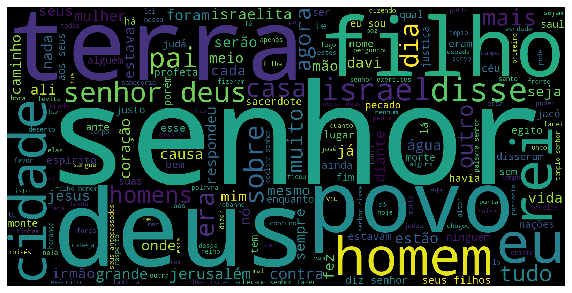

In [8]:
all_words_bible = all_words_bible.lower()

# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "e", "a","o","do","seu","dele","dela","para", "que", "com", "pelo", "no", "na", "das","dos","se","mas","como","não","pois", "ele", "ela", "quem", "vocês", "também", "lhe", "deu", "será", "por isso", "deles", "uma", "um", "porque", "entre", "até", "nos", "nas", "depois","quando", "sua", "por", "foi", "eles", "todo", "então", "nem", "pela", "por isso", "assim", "toda", "ou", "aquele", "minha", "meu", "lhes", "são", "todos", "este", "está", "isso", " isso", "São"])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_words_bible)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("bible_wordcloud.png")

Agora, vamos enviar uma imagem para que seja utilizada como background da WordCloud.


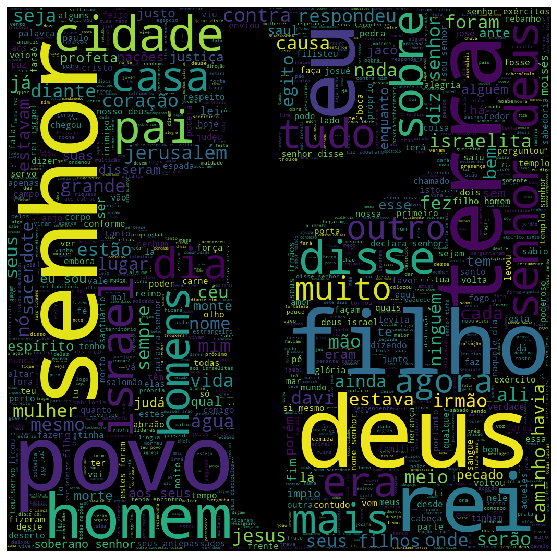

In [9]:
# endereço LOCAL da SUA imagem
cruz_mask = np.array(Image.open("cruz-quadrada.png"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=1000,
                      mask=cruz_mask, max_font_size=200,
                      min_font_size=5).generate(all_words_bible.lower())

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("cruz_wordcloud_bible.png")